In [1]:
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
print(boston.keys())
print(boston.data.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)


In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
import numpy as np
import pandas as pd
 
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


## Ex1

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(bos, boston.target, test_size=.2, random_state=7534)

In [7]:
print(bos.shape[0])
print(float(X_train.shape[0]) / float(bos.shape[0]))
print(float(X_test.shape[0]) / float(bos.shape[0]))

506
0.7984189723320159
0.2015810276679842


## Ex 2

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
reg = LinearRegression().fit(X_train, y_train)
Y_pred = reg.predict(X_test)

In [10]:
import matplotlib.pyplot as plt

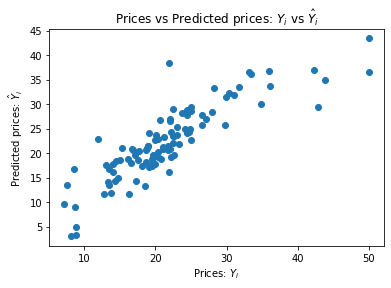

In [11]:
plt.scatter(y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

The ideal scatter should be a straigt line in angle of 45'

## Ex 3

In [12]:
from sklearn.metrics import mean_squared_error 

In [13]:
mean_squared_error(y_test, Y_pred)

17.62920699122006

## Ex4

In [14]:
reg.score(X_train, y_train)

0.7379970143518502

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler().fit(bos)

In [17]:
bos_std = scaler.transform(bos)

In [19]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)

In [20]:
bos_std = polynomial_features.fit_transform(bos_std)

In [21]:
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(bos_std, boston.target, test_size=.2, random_state=7534)

In [22]:
print(bos_std.shape[0])
print(float(X_train_std.shape[0]) / float(bos_std.shape[0]))
print(float(X_test_std.shape[0]) / float(bos_std.shape[0]))

506
0.7984189723320159
0.2015810276679842


In [23]:
X_train_std.shape

(404, 105)

In [24]:
X_test_std.shape

(102, 105)

In [25]:
reg_std = LinearRegression().fit(X_train_std, y_train_std)

In [26]:
Y_pred_std = reg_std.predict(X_test_std)

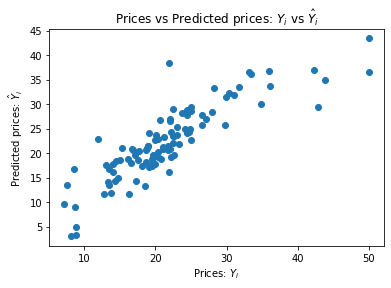

In [27]:
plt.scatter(y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [28]:
mean_squared_error(y_test_std, Y_pred_std)

11.449921341690365

In [29]:
reg_std.score(X_train_std, y_train_std)

0.9323188560512323

## Ex 5

In [30]:
from sklearn.linear_model import Ridge, Lasso

In [39]:
lasso = Lasso(alpha=1)
lasso.fit(X_train_std, y_train_std)

Lasso(alpha=1)

In [40]:
lasso.score(X_train_std, y_train_std)

0.7771343417478858

In [41]:
lasso.score(X_test_std, y_test_std)

0.7150050298968508

In [38]:
import numpy as np

In [43]:
alpha = np.logspace(0.001, 100)
train = []
test = []
for a in alpha:
    lasso = Lasso(a)
    lasso.fit(X_train_std, y_train_std)
    train.append(lasso.score(X_train_std, y_train_std))
    test.append(lasso.score(X_test_std, y_test_std))

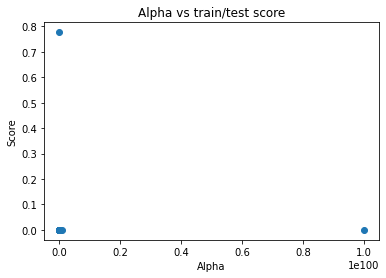

In [44]:
plt.scatter(alpha, train)
plt.xlabel("Alpha")
plt.ylabel("Score")
plt.title("Alpha vs train/test score")
plt.show()

In [31]:
# Regularization for logistic regression

In [32]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()